In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

     PassengerId  Survived  Pclass                            Name     Sex  \
496          497         1       1  Eustis, Miss. Elizabeth Mussey  female   
241          242         1       3  Murphy, Miss. Katherine "Kate"  female   
129          130         0       3              Ekstrom, Mr. Johan    male   

      Age  SibSp  Parch  Ticket     Fare Cabin Embarked  
496  54.0      1      0   36947  78.2667   D20        C  
241   NaN      1      0  367230  15.5000   NaN        Q  
129  45.0      0      0  347061   6.9750   NaN        S  


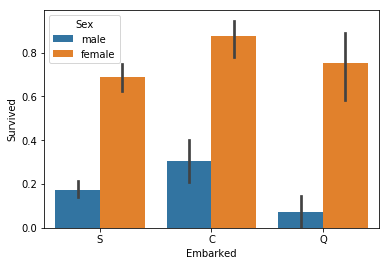

In [34]:
print(train_df.sample(3))
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=train_df)

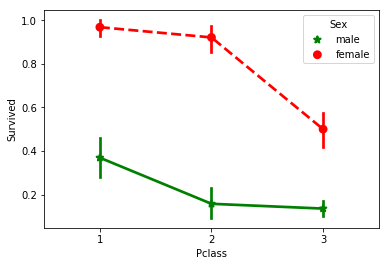

In [35]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=train_df,
              palette={"male": "green", "female": "red"},
              markers=["*", "o"], linestyles=["-", "--"]);

In [36]:
def simplify_ages(df):
    #Replace all NaN values with -0.5
    df.Age = df.Age.fillna(-0.5)
    
    #Create bins (intervals) for the age groups
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    
    #Assign a group to every age
    df.Age = pd.cut(df.Age, bins, labels=group_names)
    
    return df

def simplify_cabins(df):
    #Replace all NaN values with the letter N
    df.Cabin = df.Cabin.fillna("N")
    
    #Get only the letter of the cabin
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    
    return df

def simplify_fares(df):
    #Replace all NaN values with -0.5
    df.Fare = df.Fare.fillna(-0.5)
    
    #Create bins (intervals) for the fare groups
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    
    #Assign a group to every fare
    df.Fare = pd.cut(df.Fare, bins, labels=group_names)
    
    return df

def format_name(df):
    #New feature: passenger's last name
    df['LastName'] = df.Name.apply(lambda x: x.split(" ")[0])
    
    #New feature: passenger's name prefix
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(" ")[1])
    
    return df

def drop_features(df):
    #Drop useless features
    return df.drop(['Ticket', 'Embarked', 'Name'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

train_df = transform_features(train_df)
test_df = transform_features(test_df)
train_df.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,LastName,NamePrefix
0,1,0,3,male,Student,1,0,1_quartile,N,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4_quartile,C,"Cumings,",Mrs.
2,3,1,3,female,Young Adult,0,0,1_quartile,N,"Heikkinen,",Miss.
3,4,1,1,female,Young Adult,1,0,4_quartile,C,"Futrelle,",Mrs.
4,5,0,3,male,Young Adult,0,0,2_quartile,N,"Allen,",Mr.
5,6,0,3,male,Unknown,0,0,2_quartile,N,"Moran,",Mr.
6,7,0,1,male,Adult,0,0,4_quartile,E,"McCarthy,",Mr.
7,8,0,3,male,Baby,3,1,3_quartile,N,"Palsson,",Master.
8,9,1,3,female,Young Adult,0,2,2_quartile,N,"Johnson,",Mrs.
9,10,1,2,female,Teenager,1,0,3_quartile,N,"Nasser,",Mrs.


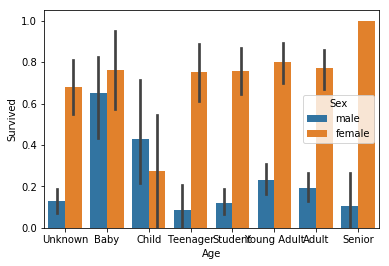

In [37]:
sns.barplot(x='Age', y='Survived', hue='Sex', data=train_df)

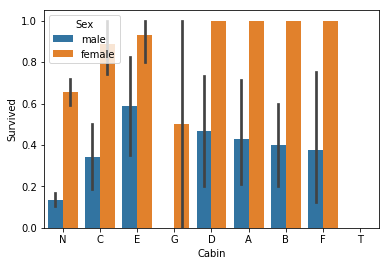

In [38]:
sns.barplot(x='Cabin', y='Survived', hue='Sex', data=train_df)

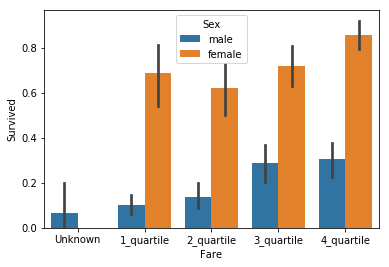

In [39]:
sns.barplot(x='Fare', y='Survived', hue='Sex', data=train_df)

In [40]:
#Normalize labels. Convert each unique string value into a number.

from sklearn import preprocessing
def encode_features(train_df, test_df):
    features = ['Sex', 'Age', 'LastName', 'NamePrefix', 'Cabin', 'Fare']
    combined_df = pd.concat([train_df[features], test_df[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(combined_df[feature])
        train_df[feature] = le.transform(train_df[feature])
        test_df[feature] = le.transform(test_df[feature])
    return train_df, test_df

train_df, test_df = encode_features(train_df, test_df)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,LastName,NamePrefix
0,1,0,3,1,4,1,0,0,7,100,19
1,2,1,1,0,0,1,0,3,2,182,20
2,3,1,3,0,7,0,0,0,7,329,16
3,4,1,1,0,7,1,0,3,2,267,20
4,5,0,3,1,7,0,0,1,7,15,19


In [41]:
#Split up the training data
from sklearn.model_selection import train_test_split

#Separate the features (x) from the labels (y)

#x_all: all features minus the value we want to predict (survived)
x_all = train_df.drop(['Survived', 'PassengerId'], axis=1)
#y_all: only the value we want to predict
y_all = train_df['Survived']

#Training 80% of the data and then testing against the other 20%
num_test = 0.20
#Randomly shuffle this data into four variables
x_train, x_test, y_train, y_test = train_test_split(x_all, y_all, test_size=num_test, random_state=23)

In [42]:
#Fitting and tuning an algorithm

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

#Choose the type of classifier
clf = RandomForestClassifier()

#Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9],
              'max_features': ['log2', 'sqrt', 'auto'],
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

#Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

#Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(x_train, y_train)

#Set the classifier to the best combination of parameters
clf = grid_obj.best_estimator_

#Fit the best algorithm to the data
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [43]:
predictions = clf.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7877094972067039


In [44]:
#Use KFold to verify the effectiveness of the algorithm

from sklearn.cross_validation import KFold

def run_kfold(clf):
    #Split our data into 10 buckets
    kf = KFold(891, n_folds=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        x_train, x_test = x_all.values[train_index], x_all.values[test_index]
        y_train, y_test = y_all.values[train_index], y_all.values[test_index]
        
        #Run the algorithm using a different bucket at each iteration
        clf.fit(x_train, y_train)
        predictions = clf.predict(x_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))
    mean_outcome = np.mean(outcomes)
    print("Mean accuracy: {0}".format(mean_outcome))


run_kfold(clf)

Fold 1 accuracy: 0.8111111111111111
Fold 2 accuracy: 0.8539325842696629
Fold 3 accuracy: 0.7865168539325843
Fold 4 accuracy: 0.8764044943820225
Fold 5 accuracy: 0.8539325842696629
Fold 6 accuracy: 0.8314606741573034
Fold 7 accuracy: 0.7640449438202247
Fold 8 accuracy: 0.8089887640449438
Fold 9 accuracy: 0.8651685393258427
Fold 10 accuracy: 0.8539325842696629
Mean accuracy: 0.8305493133583021


In [56]:
#Predict the actual data from the test

ids = test_df['PassengerId']
predictions = clf.predict(test_df.drop('PassengerId', axis=1))

output = pd.DataFrame({'PassengerId': ids, 'Survived': predictions})

output.to_csv('titanic_predictions.csv', index=False)
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
